In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data23.csv')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Обработаем пропуски в таблице

In [3]:
columns_with_missing_values = ['children', 'days_employed', 'dob_years', 'education', 'education_id', 
                               'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']

# Заменяем пропущенные значения указанным значением (0 для числовых столбцов или «Неизвестно» для категориальных столбцов)
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(value={'children': 0, 'days_employed': 0, 
                                                                                'dob_years': 0, 'education': 'Unknown', 
                                                                                'education_id': 0, 'family_status': 'Unknown', 
                                                                                'family_status_id': 0, 'gender': 'Unknown', 
                                                                                'income_type': 'Unknown', 'debt': 0, 
                                                                                'total_income': 0, 'purpose': 'Unknown'})

Деление данных и обучение модели

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Преобразуем переменные скатегориями в числовые
label_encoders = {}
for column in ['income_type', 'gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

x = df[['income_type', 'children', 'days_employed', 'dob_years', 'education_id',
          'family_status_id', 'gender', 'total_income']]
y = df['debt']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Деление данных на тестовые и обучающие выборки
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Обучаем модель с использованием логистической регрессии

In [5]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Точность логистической регрессии: {:.2f}'.format(logreg.score(x_test, y_test)))

Точность логистической регрессии: 0.92


Обучаем модель с использованием случайного леса

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Точность случайного леса: {round(accuracy_rf, 2)}')

Точность случайного леса: 0.91


Кореляционная матрица для столбцов датафрейма

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_16236\3513756343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['debt'] = y.loc[:, 'debt']


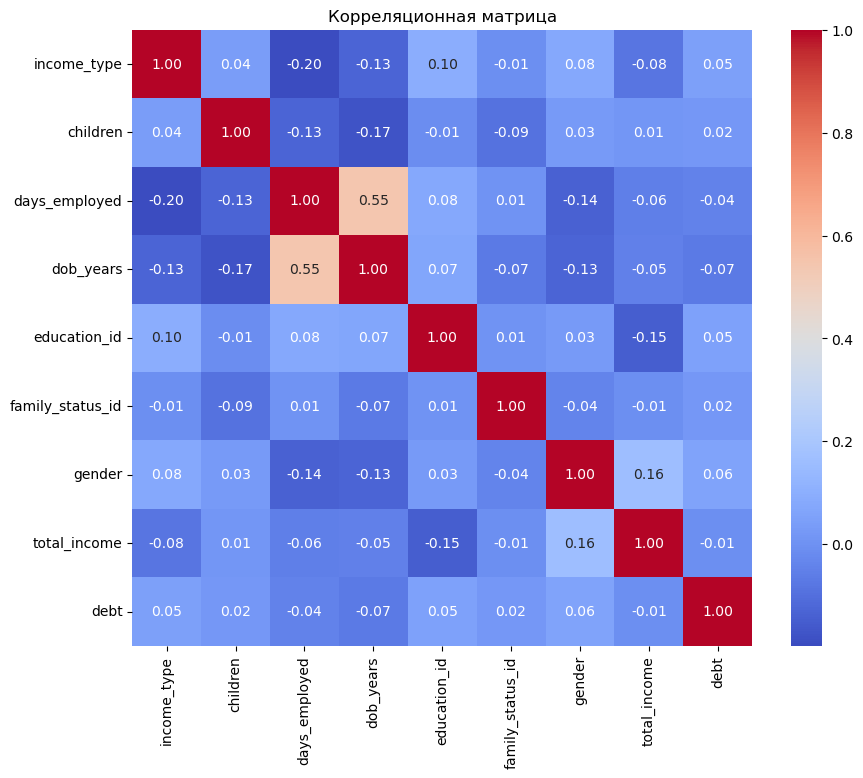

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

y = pd.DataFrame(y)
x['debt'] = y.loc[:, 'debt']
corr_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица')
plt.show()